In [1]:
#Import necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/hp/Downloads/Customertravel.csv")
data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [3]:
# Explore the first few rows of the dataset
print(data.head())

   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  


In [4]:
# Check for missing values
print(data.isnull().sum())

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64


In [5]:
# Summarize the dataset
print(data.describe())

              Age  ServicesOpted      Target
count  954.000000     954.000000  954.000000
mean    32.109015       2.437107    0.234801
std      3.337388       1.606233    0.424097
min     27.000000       1.000000    0.000000
25%     30.000000       1.000000    0.000000
50%     31.000000       2.000000    0.000000
75%     35.000000       4.000000    0.000000
max     38.000000       6.000000    1.000000


In [6]:
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
data['FrequentFlyer'] = label_encoder.fit_transform(data['FrequentFlyer'])
data['AnnualIncomeClass'] = label_encoder.fit_transform(data['AnnualIncomeClass'])
data['AccountSyncedToSocialMedia'] = label_encoder.fit_transform(data['AccountSyncedToSocialMedia'])
data['BookedHotelOrNot'] = label_encoder.fit_transform(data['BookedHotelOrNot'])

In [7]:
# Split the data into features and target variable
X = data.drop('Target', axis=1)
y = data['Target']
X

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,34,0,2,6,0,1
1,34,2,1,5,1,0
2,37,0,2,3,1,0
3,30,0,2,2,0,0
4,30,0,1,1,0,0
...,...,...,...,...,...,...
949,31,2,1,1,0,0
950,30,0,2,5,0,1
951,37,0,2,4,0,0
952,30,0,1,1,1,1


In [8]:
y

0      0
1      1
2      0
3      0
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Target, Length: 954, dtype: int64

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Building
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Model Evaluation
y_pred = model.predict(X_test)
#Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Mean Absolute Error: 0.13089005235602094
Mean Squared Error: 0.13089005235602094
Root Mean Squared Error: 0.36178730264621084
Accuracy: 86.91


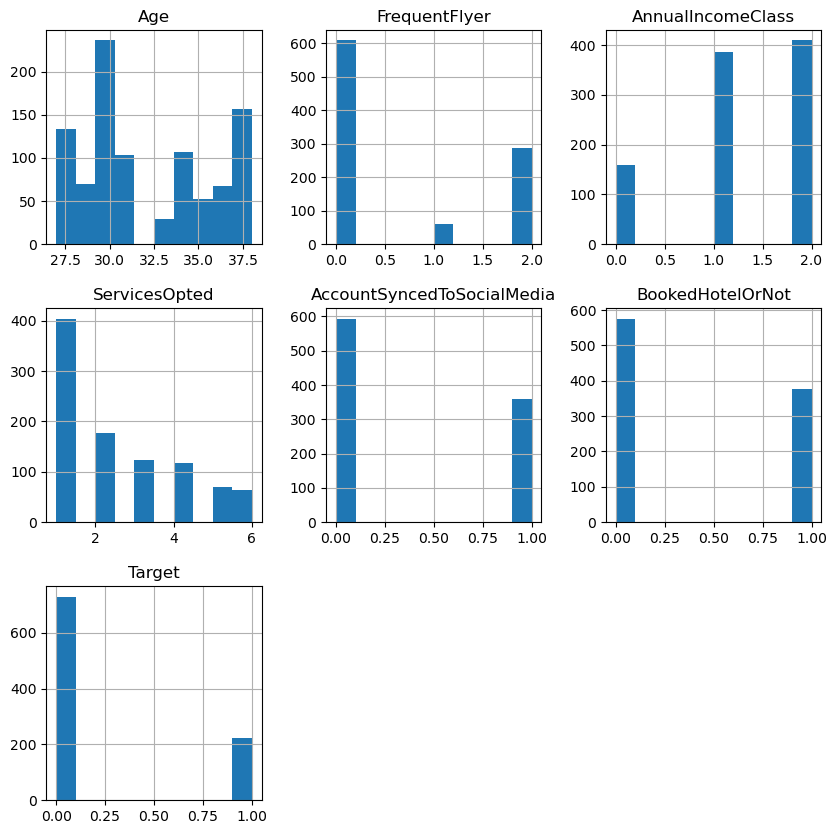

In [12]:
# Univariate Analysis
# Plot distributions of numerical variables
data.hist(figsize=(10, 10))
plt.show()

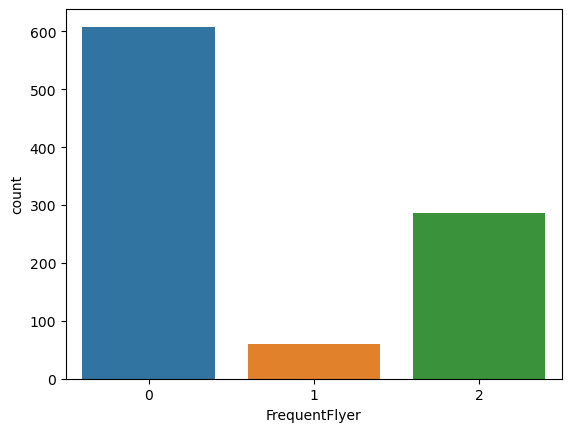

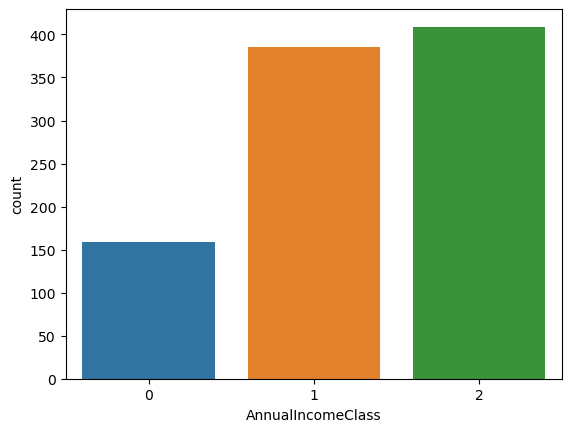

In [13]:
# Plot counts of categorical variables
sns.countplot(x='FrequentFlyer', data=data)
plt.show()
sns.countplot(x='AnnualIncomeClass', data=data)
plt.show()

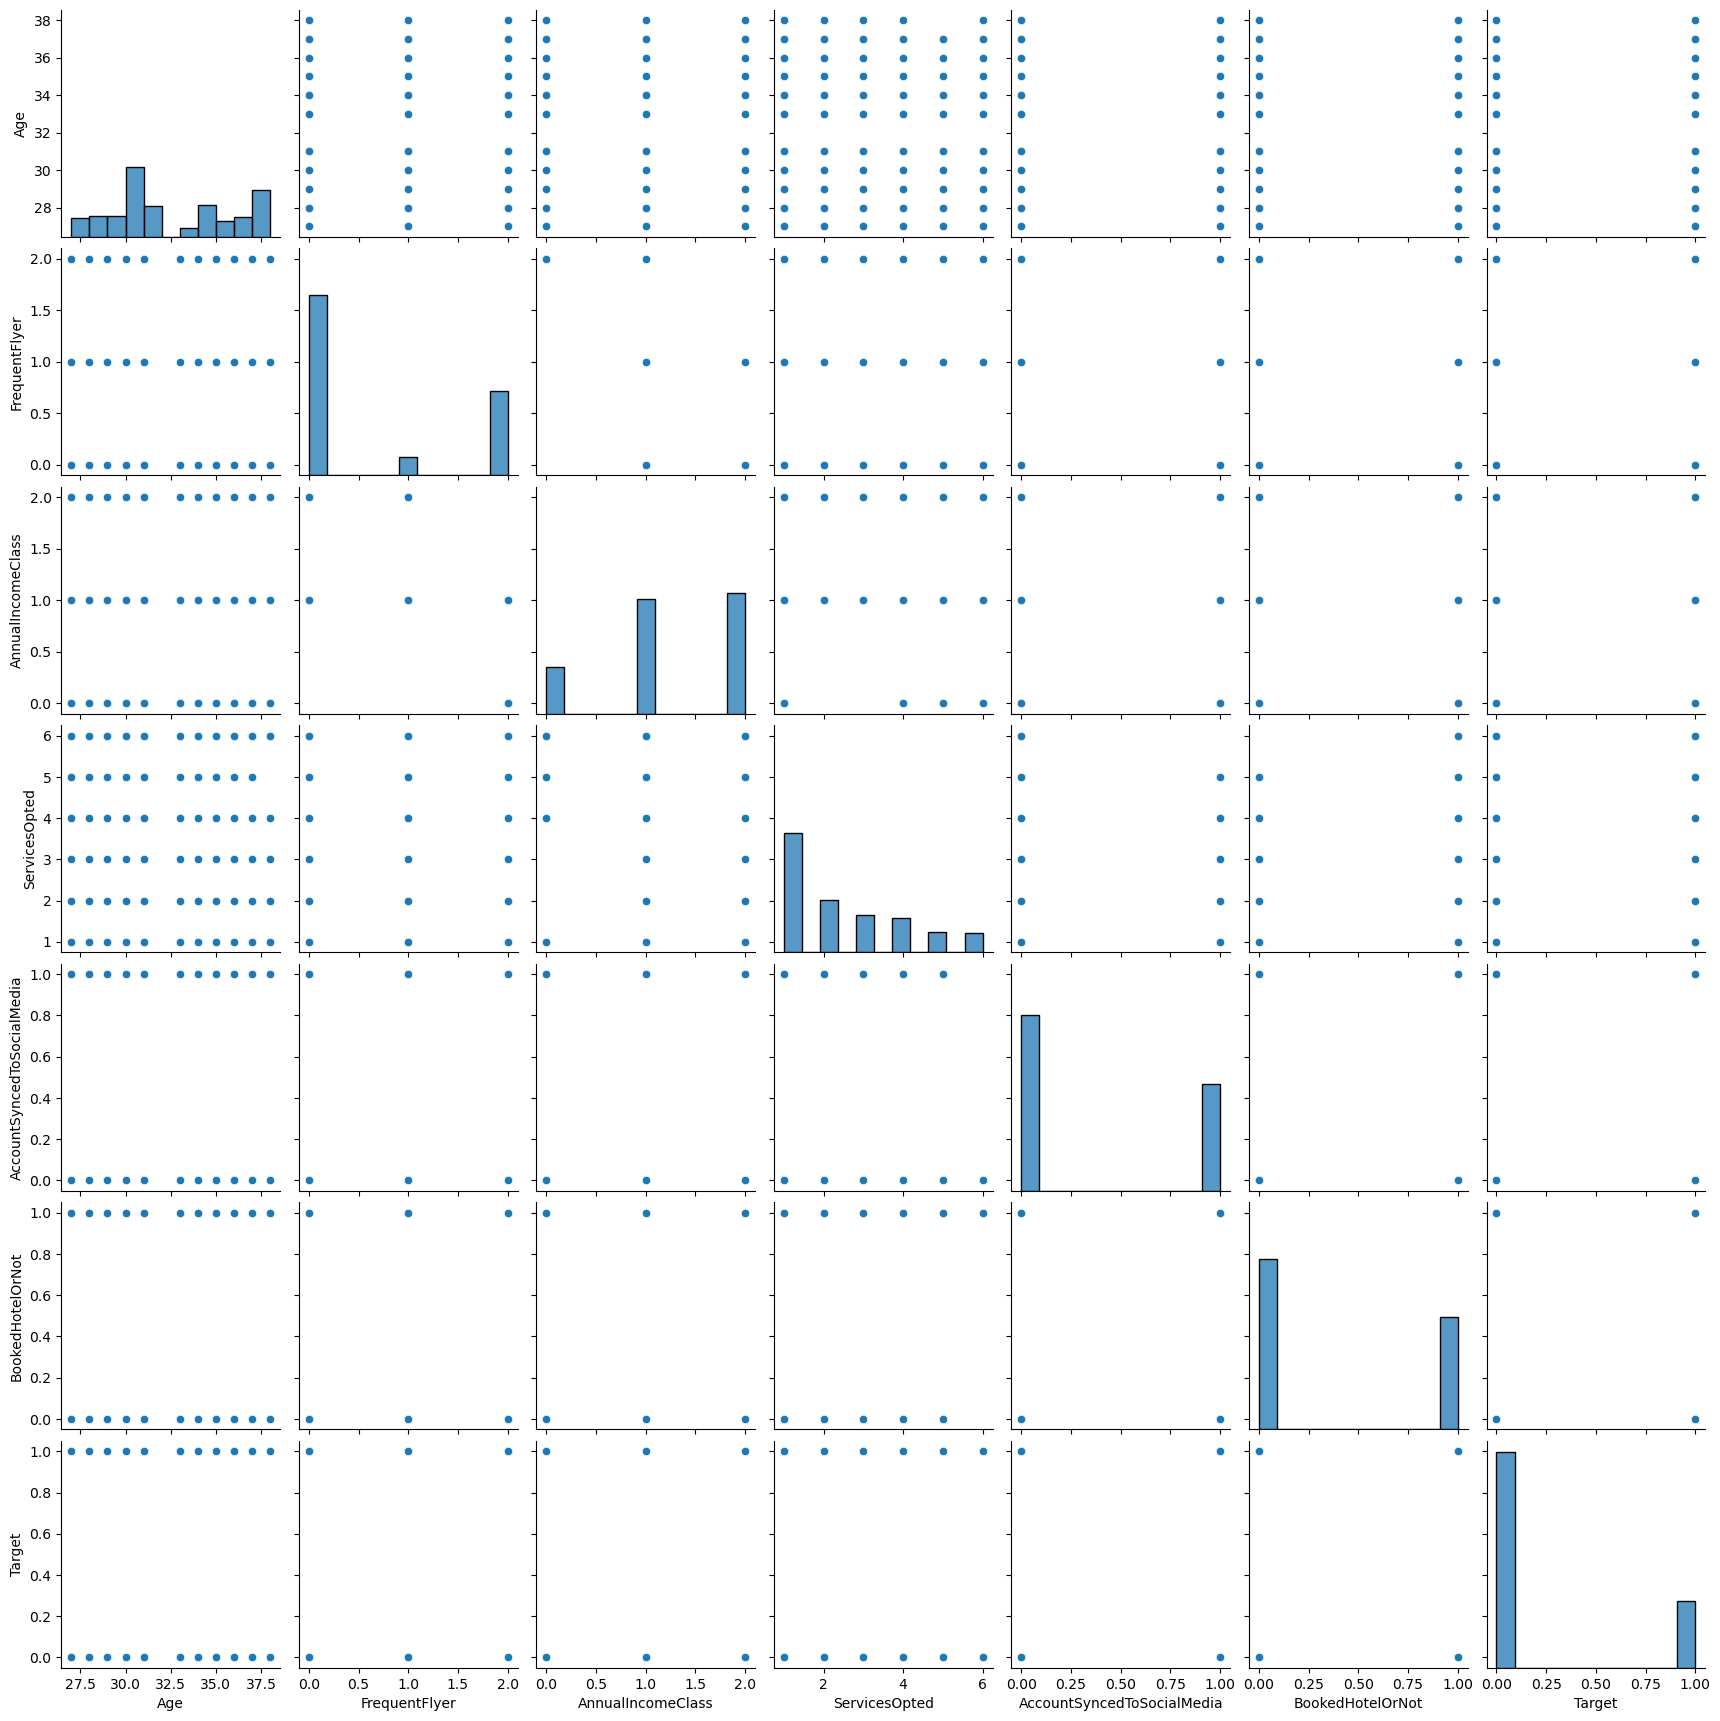

In [14]:
# Bivariate Analysis
# Plot relationships between numerical variables
sns.pairplot(data)
plt.show()

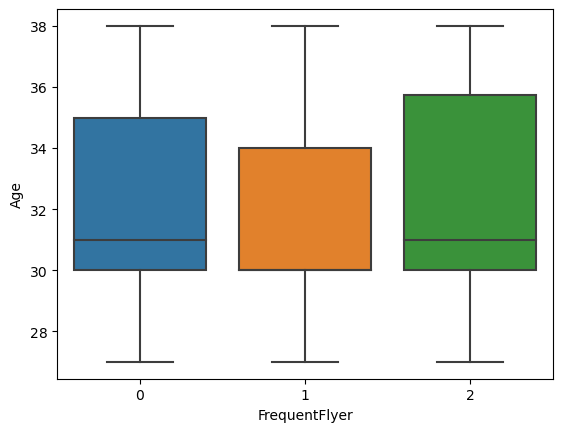

In [15]:
# Plot relationships between categorical and numerical variables
sns.boxplot(x='FrequentFlyer', y='Age', data=data)
plt.show()

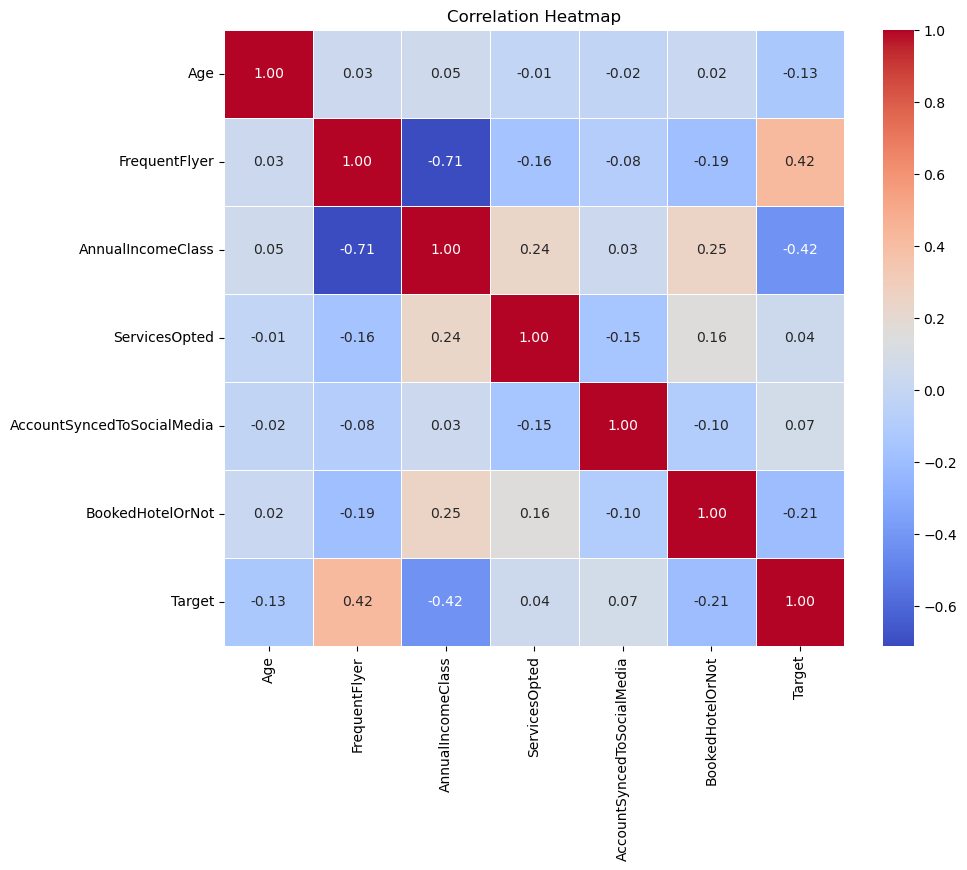

In [16]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

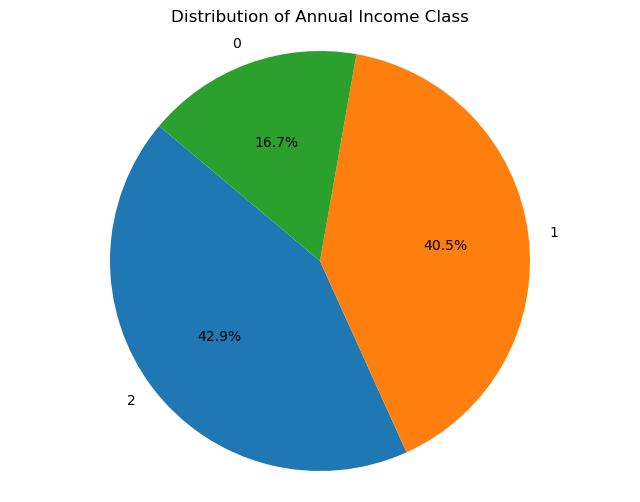

In [17]:
# Assuming 'AnnualIncomeClass' is the column you want to visualize
income_distribution = data['AnnualIncomeClass'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(income_distribution, labels=income_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Annual Income Class')
plt.axis('equal')  
plt.show()